In [1096]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import warnings

warnings.filterwarnings('ignore')

# Machine Learning: Programming Exercise 5
## Regularized Linear Regression and Bias vs. Variance
In this exercise, we will implement regularized linear regression and use it to study models with different bias-variance properties.

### 1 Regularized Linear Regression
In the first half of the exercise, we will implement regularized linear regression to predict the amount of water flowing out of a dam using the change of water level in a reservoir. In the next half, we will go through some diagnostics of debugging learning algorithms and examine the effects of bias v.s. variance.
#### 1.1 Visualizing the dataset
We will begin by visualizing the dataset containing historical records on the change in the water level, x, and the amount of water flowing out of the dam, y. This dataset is divided into three parts:
- A training set that your model will learn on: X, y
-  A cross validation set for determining the regularization parameter: Xval, yval
- A test set for evaluating performance. These are “unseen” examples which your model did not see during training: Xtest, ytest

The code below will plot the training data. In the following parts, we will implement linear regression and use that to fit a straight line to the data and plot learning curves. Following that, we will implement polynomial regression to find a better fit to the data.

Text(0,0.5,'Water flowing out of the dam (y)')

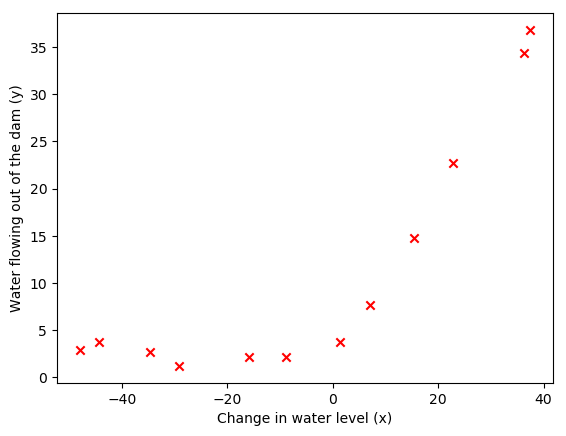

In [1097]:
# Load from ex5data1.mat
data = loadmat('ex5data1.mat')
X, y, Xval, yval, Xtest, ytest = data['X'], data['y'], data['Xval'], data['yval'], data['Xtest'], data['ytest']
# m = Number of examples
m = X.shape[0]

# Plot training data
plt.figure()
plt.scatter(X, y, c='r', marker='x', linewidths=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

#### 1.2 Regularized linear regression cost function
Recall that regularized linear regression has the following cost function:
$$ J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 \right) + \frac{\lambda}{2m} \left( \sum_{j=1}^{n} \theta_j^2 \right) $$
where $\lambda$ is the regularization parameter which controls the degree of regularization (thus, help preventing overfitting). The regularization term puts a penalty on the overall cost J. As the magnitudes of the model parameters $\theta_j$ increase, the penalty increases as well. Note that you should not regularize the $\theta_0$ term.
You should now complete the code in the function `linear_reg_cost_function` below. Your task is to write a function to calculate the regularized linear regression cost function. If possible, try to vectorize your code and avoid writing loops.

In [1098]:
def linear_reg_cost_function(X, y, theta, lambda_):
    h = X @ theta
    h = h.reshape(-1, 1)
    J = np.sum((h - y) ** 2) / (2 * m) + (lambda_ / (2 * m)) * theta[1:].T @ theta[1:]
    return J

When you are finished, the next part will run your cost function using $\theta$ initialized at [1, 1]. You should expect to see an output of 303.993.

In [1099]:
theta = np.array([1, 1])
J = linear_reg_cost_function(np.concatenate([np.ones((m, 1)), X], axis=1), y, theta, 1)
print('Cost at theta = [1, 1]:', J)

Cost at theta = [1, 1]: 303.9931922202643


#### 1.3 Regularized linear regression gradient
Correspondingly, the partial derivative of regularized linear regression’s cost for $\theta_j$ is defined as:
$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)} \quad \text{for} \quad j = 0 $$
$$ \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)} \right) + \frac{\lambda}{m} \theta_j \quad \text{for} \quad j \geq 1 $$
In 'linear_reg_cost_function', add code to calculate the gradient, returning it in the variable `grad`.

In [1100]:
def linear_reg_cost_function(X, y, theta, lambda_):
    theta = theta.reshape(-1, 1)
    h = X @ theta
    h = h.reshape(-1, 1)
    J = np.sum((h - y) ** 2) / (2 * m) + (lambda_ / (2 * m)) * theta[1:].T @ theta[1:]

    theta_j = theta.copy()
    theta_j[0] = 0
    theta_j = theta_j.reshape(-1, 1)
    grad = (X.T @ (h - y) + lambda_ * theta_j) / m
    grad[0] = (X.T @ (h - y))[0] / m
    grad = grad.ravel()
    return J, grad

 When you are finished, the next part will run your gradient function using $\theta$ initialized at [1, 1]. You should expect to see a gradient of [-15.30, 598.250].

In [1101]:
J, grad = linear_reg_cost_function(np.concatenate([np.ones((m, 1)), X], axis=1), y, theta, 1)
print('Gradient at theta = [1, 1]:', grad[0], grad[1])

Gradient at theta = [1, 1]: -15.303015674201186 598.2507441727035


#### 1.4 Fitting linear regression
Once your cost function and gradient are working correctly, the next part will run the code in `train_linear_reg` to compute the optimal values of $\theta$. This training function uses `scipy`'s optimization module to minimize the cost function. In this part, we set regularization parameter $\lambda$ to zero. Because our current implementation of linear regression is trying to fit a 2-dimensional $\theta$, regularization will not be incredibly helpful for a $\theta$ of such low dimension. In the later parts of the exercise, you will be using polynomial regression with regularization.

In [1102]:
from scipy.optimize import minimize

def train_linear_reg(X, y, lambda_):
    iteration = 1
    def callback(theta):
        nonlocal iteration
        print(f'Iteration\t{iteration}| Cost: {cost_function(theta)[0][0][0]}')
        iteration += 1
    # Initialize Theta
    initial_theta = np.zeros(X.shape[1])

    # Create "short hand" for the cost function to be minimized
    cost_function = lambda t: linear_reg_cost_function(X, y, t, lambda_)

    # Now, costFunction is a function that takes in only one argument
    options = {'maxiter': 200}

    # Minimize using scipy
    theta = minimize(cost_function, initial_theta, jac=True, method='CG', options=options, callback=callback)

    return theta.x

In [1103]:
# Train linear regression with lambda = 0
lambda_ = 0
theta = train_linear_reg(np.concatenate([np.ones((m, 1)), X], axis=1), y, lambda_)

Iteration	1| Cost: 105.2434884945551
Iteration	2| Cost: 22.373906495108915


Finally, the code below should plot the best fit line, resulting in an image similar to the one below. The best fit line tells us that the model is not a good fit to the data because the data has a non-linear pattern.

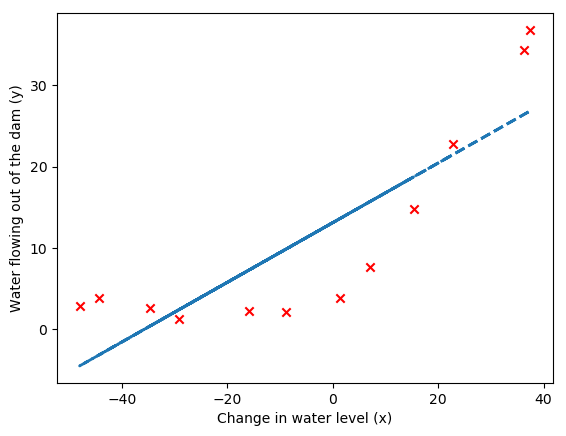

In [1104]:
fig, ax = plt.subplots()
ax.scatter(X, y, c='r', marker='x', linewidths=1.5)
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)')
ax.plot(X, np.concatenate([np.ones((m, 1)), X], axis=1) @ theta, '--', linewidth=2)

While visualizing the best fit as shown above is one possible way to debug your learning algorithm, it is not always easy to visualize the data and model. In the next section, you will implement a function to generate learning curves that can help you debug your learning algorithm even if it is not easy to visualize the data.

### 2. Bias-variance
An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data. In this part of the exercise, you will plot training and test errors on a learning curve to diagnose bias-variance problems.
#### 2.1 Learning Curves
You will now implement code to generate the learning curves that will be useful in debugging learning algorithms. Recall that a learning curve plots training and cross validation error as a function of training set size. Your job is to fill in the function `learning_curve` so that it returns a vector of errors for the training set and cross validation set.
To plot the learning curve, we need a training and cross validation set error for different training set sizes. To obtain different training set sizes, you should use different subsets of the original training set X. Specifically, for a training set size of i, you should use the first i examples (i.e., X[:i, :] and y[:i]). You can use the `train_linear_reg` function to find the $\theta$ parameters. Note that the lambda is passed as a parameter to the `learning_curve` function. After learning the $\theta$ parameters, you should compute the error on the training and cross validation sets. Recall that the training error for a dataset is defined as:
$$ J_{\text{train}}(\theta) = \frac{1}{2m} \left( \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 \right) $$
In particular, note that the training error does not include the regularization term. One way to compute the training error is to use your existing cost function and set $\lambda$ to 0 only when using it to compute the training error and cross validation error. When you are computing the training set error, make sure you compute it on the training subset (i.e., X[:n, :] and y[:n]) instead of the entire training set. However, for the cross validation error, you should compute it over the entire cross validation set. You should store the computed errors in the vectors `error_train` and `error_val`.
In Figure 3, you can observe that both the train error and cross validation error are high when the number of training examples is increased. This reflects a high bias problem in the model - the linear regression model is too simple and is unable to fit our dataset well. In the next section, you will implement polynomial regression to fit a better model for this dataset.


In [1105]:
def learning_curve(X, y, Xval, yval, lambda_):
    m = X.shape[0]
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    for i in range(1, m + 1):
        theta = train_linear_reg(X[:i, :], y[:i], lambda_)
        error_train[i - 1] = linear_reg_cost_function(X[:i, :], y[:i], theta, 0)[0]
        error_val[i - 1] = linear_reg_cost_function(Xval, yval, theta, 0)[0]
    return error_train, error_val

When you are finished, run the code below to compute the learning curves and produce a plot similar to Figure 3.

In [1106]:
lambda_ = 0
error_train, error_val = learning_curve(np.concatenate([np.ones((m, 1)), X], axis=1), y,
                                        np.concatenate([np.ones((Xval.shape[0], 1)), Xval], axis=1), yval, lambda_)

Iteration	1| Cost: 0.0
Iteration	1| Cost: 0.07137213972736668
Iteration	2| Cost: 3.4356535882594276e-29
Iteration	1| Cost: 25.538487628732597
Iteration	2| Cost: 0.8216487613753176
Iteration	1| Cost: 34.59517205935544
Iteration	2| Cost: 0.9475592297999329
Iteration	1| Cost: 66.36005724449286
Iteration	2| Cost: 5.4808536704645485
Iteration	1| Cost: 67.6676562452292
Iteration	2| Cost: 9.721981256247735
Iteration	1| Cost: 70.74319779585552
Iteration	2| Cost: 11.72413763213518
Iteration	1| Cost: 80.61529988078732
Iteration	2| Cost: 12.115239130133347
Iteration	1| Cost: 81.0550970028087
Iteration	2| Cost: 16.957054068716044
Iteration	1| Cost: 92.3842909694492
Iteration	2| Cost: 19.384551327176517
Iteration	1| Cost: 93.81110810522041
Iteration	2| Cost: 22.290812122373808
Iteration	1| Cost: 105.2434884945551
Iteration	2| Cost: 22.373906495108915


(0, 150)

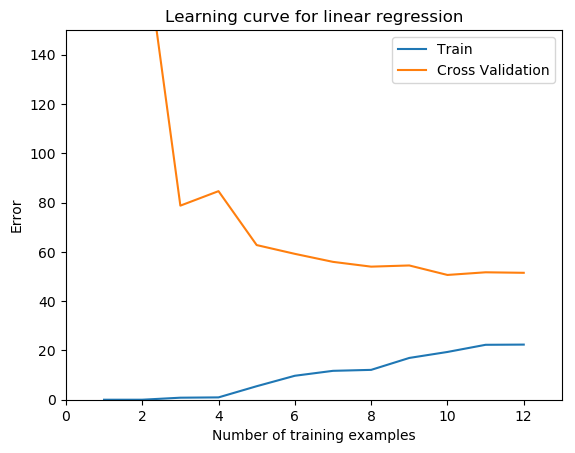

In [1107]:
plt.plot(range(1, m + 1), error_train, label='Train')
plt.plot(range(1, m + 1), error_val, label='Cross Validation')
plt.legend()
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.xlim(0, 13)
plt.ylim(0, 150)

In [1108]:
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t\t\t%f\t%f' % (i + 1, error_train[i], error_val[i]))

# Training Examples	Train Error	Cross Validation Error
  	1				0.000000	358.961918
  	2				0.000000	193.025641
  	3				0.821649	78.767905
  	4				0.947559	84.645595
  	5				5.480854	62.764038
  	6				9.721981	59.202433
  	7				11.724138	55.949225
  	8				12.115239	54.009281
  	9				16.957054	54.487996
  	10				19.384551	50.638363
  	11				22.290812	51.715005
  	12				22.373906	51.509182


### 3 Polynomial regression
The problem with our linear model was that it was too simple for the data and resulted in underfitting (high bias). In this part of the exercise, you will address this problem by adding more features. For polynomial regression, our hypothesis has the form:
$$ h_{\theta}(x) = \theta_0 + \theta_1 \times (\text{waterLevel}) + \theta_2 \times (\text{waterLevel})^2 + \ldots + \theta_p \times (\text{waterLevel})^p $$
Notice that by defining $x_1 = (\text{waterLevel})$, $x_2 = (\text{waterLevel})^2$, $\ldots$, $x_p = (\text{waterLevel})^p$, we obtain a linear regression model where the features are the various powers of the original value (`waterLevel`).
Now, you will add more features using the higher powers of the existing feature `X` in the dataset. Your task in this part is to complete the code in the function `poly_features` so that the function maps the original training set `X` of size $m \times 1$ into its higher powers. Specifically, when a training set `X` of size $m \times 1$ is passed into the function, the function should return a $m \times p$ matrix `X_poly`, where column 1 holds the original values of `X`, column 2 holds the values of `X^2`, column 3 holds the values of `X^3`, and so on. Note that you don’t have to account for the zero-eth power in this function. Now that you have a function that will map features to a higher dimension, the code in the next section will apply it to the training set, the test set, and the cross validation set (which you haven't used yet).

In [1109]:
def poly_features(X, p):
    X_poly = np.zeros((X.shape[0], p))
    for i in range(p):
        X_poly[:, i] = X[:, 0] ** (i + 1)
    return X_poly

#### 3.1 Learning Polynomial Regression
After you have completed the function `poly_features`, we will proceed to train polynomial regression using your linear regression cost function. Keep in mind that even though we have polynomial terms in our feature vector, we are still solving a linear regression optimization problem. The polynomial terms have simply turned into features that we can use for linear regression. We are using the same cost function and gradient that you wrote for the earlier part of this exercise.
For this part of the exercise, you will be using a polynomial of degree 8. It turns out that if we run the training directly on the projected data, it will not work well as the features would be badly scaled (e.g., an example with $x = 40$ will now have a feature $x_8 = 40^8 = 6.5 \times 10^{12}$). Therefore, you will need to use feature normalization. Before learning the parameters $\theta$ for the polynomial regression, we should first normalize the features of the training set, storing the `mu`, `sigma` parameters separately. We have already implemented this function for you and it is the same function from the first exercise.

In [1110]:
def feature_normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [1111]:
def plot_fit(min_x, max_x, mu, sigma, theta, p):
    x = np.arange(min_x - 15, max_x + 25, 0.05).reshape(-1, 1)
    X_poly = poly_features(x, p)
    X_poly = X_poly - mu
    X_poly = X_poly / sigma
    X_poly = np.concatenate([np.ones((x.shape[0], 1)), X_poly], axis=1)
    plt.plot(x, X_poly @ theta, '--', linewidth=2)

In [1112]:
p = 8

# Map X onto Polynomial Features and Normalize
X_poly = poly_features(X, p)
X_poly, mu, sigma = feature_normalize(X_poly)  # Normalize
X_poly = np.concatenate([np.ones((m, 1)), X_poly], axis=1)  # Add Ones

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = poly_features(Xtest, p)
X_poly_test = X_poly_test - mu  # uses implicit expansion
X_poly_test = X_poly_test / sigma  # uses implicit expansion
X_poly_test = np.concatenate([np.ones((X_poly_test.shape[0], 1)), X_poly_test], axis=1)  # Add Ones

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = poly_features(Xval, p)
X_poly_val = X_poly_val - mu  # uses implicit expansion
X_poly_val = X_poly_val / sigma  # uses implicit expansion
X_poly_val = np.concatenate([np.ones((X_poly_val.shape[0], 1)), X_poly_val], axis=1)  # Add Ones

print('Normalized Training Example 1:')
for i in range(X_poly.shape[1]):
    print('  %f' % X_poly[0, i])

Normalized Training Example 1:
  1.000000
  -0.362141
  -0.755087
  0.182226
  -0.706190
  0.306618
  -0.590878
  0.344516
  -0.508481


In [1113]:
# Train the model
lambda_ = 0
theta = train_linear_reg(X_poly, y, lambda_)

Iteration	1| Cost: 76.0225051911173
Iteration	2| Cost: 17.170785488512646
Iteration	3| Cost: 4.388152728268531
Iteration	4| Cost: 3.1951413546429692
Iteration	5| Cost: 2.4634946641318147
Iteration	6| Cost: 1.224274582168893
Iteration	7| Cost: 1.0928246997831768
Iteration	8| Cost: 0.6998658722443585
Iteration	9| Cost: 0.42644373939596264
Iteration	10| Cost: 0.4195687859797102
Iteration	11| Cost: 0.4134960367158244
Iteration	12| Cost: 0.38990414676733565
Iteration	13| Cost: 0.37475797912296294
Iteration	14| Cost: 0.37408171184252764
Iteration	15| Cost: 0.3572804729927941
Iteration	16| Cost: 0.340098159436919
Iteration	17| Cost: 0.33862188356726924
Iteration	18| Cost: 0.33060425637183755
Iteration	19| Cost: 0.3294489562814954
Iteration	20| Cost: 0.3274724975341856
Iteration	21| Cost: 0.3230007853534324
Iteration	22| Cost: 0.3084177518986118
Iteration	23| Cost: 0.3005838265488394
Iteration	24| Cost: 0.29312602947733174
Iteration	25| Cost: 0.27871069940407805
Iteration	26| Cost: 0.270286517

After learning the parameters $\theta$, you should see two plots (Figures 4, 5) generated for polynomial regression with $\lambda = 0$. 
From Figure 4, you should see that the polynomial fit is able to follow the datapoints very well - thus, obtaining a low training error. However, the polynomial fit is very complex and even drops off at the extremes. This is an indicator that the polynomial regression model is overfitting the training data and will not generalize well.

Text(0.5,1,'Polynomial Regression Fit (lambda = 0)')

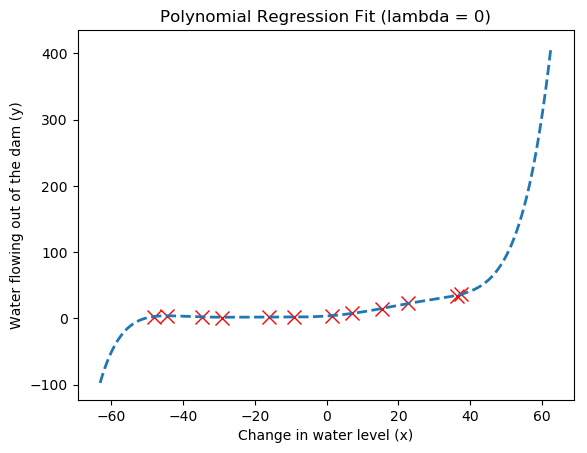

In [1114]:
# Plot training data and fit
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plot_fit(X.min(), X.max(), mu, sigma, theta, p)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title(f'Polynomial Regression Fit (lambda = {lambda_})')

In [1115]:
error_train, error_val = learning_curve(X_poly, y, X_poly_val, yval, lambda_)

Iteration	1| Cost: 2.3748000167590875e-30
Iteration	1| Cost: 0.006938523582734608
Iteration	2| Cost: 6.079243256290091e-06
Iteration	3| Cost: 1.706779886238778e-07
Iteration	4| Cost: 1.5430086188307498e-11
Iteration	1| Cost: 0.47687717915263933
Iteration	2| Cost: 0.24363090376232008
Iteration	3| Cost: 1.9897105195397608e-25
Iteration	1| Cost: 0.26534961467196067
Iteration	2| Cost: 0.07047237603450938
Iteration	3| Cost: 0.009008806596345736
Iteration	4| Cost: 9.964294378692248e-25
Iteration	1| Cost: 28.672671835984087
Iteration	2| Cost: 1.1010569731415487
Iteration	3| Cost: 0.03169853004682629
Iteration	4| Cost: 0.012034349035333833
Iteration	5| Cost: 1.1556685368676153e-14
Iteration	1| Cost: 30.254451998567514
Iteration	2| Cost: 1.3591803161321607
Iteration	3| Cost: 0.024719901507833153
Iteration	4| Cost: 0.02309376519652821
Iteration	5| Cost: 0.011102665554568457
Iteration	6| Cost: 0.010720745420131675
Iteration	7| Cost: 0.010653261529956817
Iteration	8| Cost: 0.010481775617951536
Ite

(0, 100)

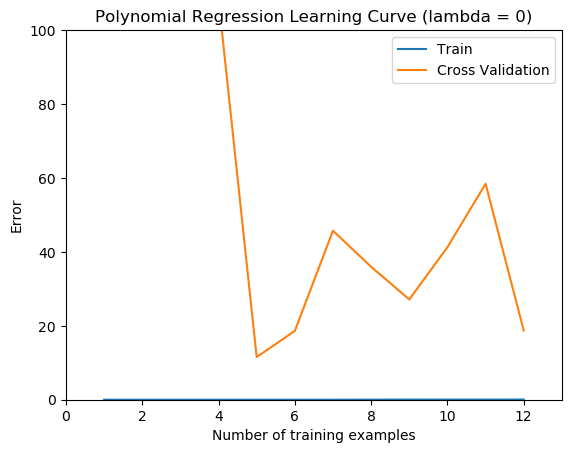

In [1116]:
plt.plot(range(1, m + 1), error_train, label='Train')
plt.plot(range(1, m + 1), error_val, label='Cross Validation')
plt.legend()
plt.title(f'Polynomial Regression Learning Curve (lambda = {lambda_})')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.xlim(0, 13)
plt.ylim(0, 100)

To better understand the problems with the unregularized ($\lambda = 0$) model, you can see that the learning curve shows the same effect where the low training error is low, but the cross validation error is high. There is a gap between the training and cross validation errors, indicating a high variance problem. One way to combat the overfitting (high-variance) problem is to add regularization to the model. In the next section, you will get to try different $\lambda$ parameters to see how regularization can lead to a better model.

#### 3.2 Optional (ungraded) exercise: Adjusting the regularization parameter
In this section, you will get to observe how the regularization parameter affects the bias-variance of regularized polynomial regression. You should now modify the lambda parameter in code below and try $\lambda = 1, 100$. 

Iteration	1| Cost: 76.73307643653462
Iteration	2| Cost: 21.768765689642972
Iteration	3| Cost: 11.087036167456592
Iteration	4| Cost: 8.740242328620647
Iteration	5| Cost: 7.65706262369022
Iteration	6| Cost: 7.590553389843928
Iteration	7| Cost: 7.502068968753051
Iteration	8| Cost: 7.413423085935504
Iteration	9| Cost: 7.381934426519338
Iteration	10| Cost: 7.3410740267138905
Iteration	11| Cost: 7.317583739025618
Iteration	12| Cost: 7.305638177281026
Iteration	13| Cost: 7.291480488111335
Iteration	14| Cost: 7.274130311000576
Iteration	15| Cost: 7.269985711435952
Iteration	16| Cost: 7.269126030605475
Iteration	17| Cost: 7.268975686137923
Iteration	18| Cost: 7.2687745006872255
Iteration	19| Cost: 7.268709548098244
Iteration	20| Cost: 7.268406724908998
Iteration	21| Cost: 7.268154501435445
Iteration	22| Cost: 7.268149970124351
Iteration	23| Cost: 7.268148901484151
Iteration	24| Cost: 7.2681483060908025
Iteration	25| Cost: 7.26814823187895
Iteration	26| Cost: 7.268148156115741
Iteration	27| Cost

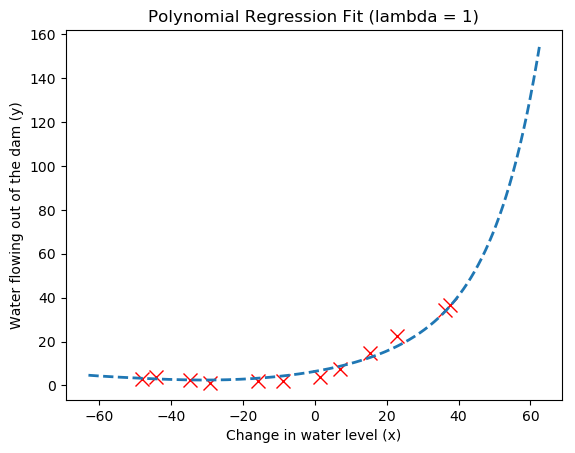

Iteration	1| Cost: 0.03425710473623644
Iteration	2| Cost: 6.495912936466996e-30
Iteration	1| Cost: 0.0338791839874995
Iteration	2| Cost: 0.01727666647579265
Iteration	3| Cost: 0.012115725920851961
Iteration	1| Cost: 5.892429182521535
Iteration	2| Cost: 5.102225585434252
Iteration	3| Cost: 4.769803576703665
Iteration	4| Cost: 4.624698157626824
Iteration	1| Cost: 6.2781296616680295
Iteration	2| Cost: 5.682689854487358
Iteration	3| Cost: 5.189704023937213
Iteration	4| Cost: 4.9675824184985675
Iteration	5| Cost: 4.911907235613698
Iteration	6| Cost: 4.866005061267467
Iteration	7| Cost: 4.862608588055926
Iteration	8| Cost: 4.859615731443881
Iteration	9| Cost: 4.859379799404324
Iteration	10| Cost: 4.858783149200436
Iteration	11| Cost: 4.858714901838139
Iteration	12| Cost: 4.858637733496955
Iteration	13| Cost: 4.858627894851373
Iteration	14| Cost: 4.8586246313291275
Iteration	15| Cost: 4.858622601434101
Iteration	16| Cost: 4.858621233986802
Iteration	17| Cost: 4.858621233896729
Iteration	18| C

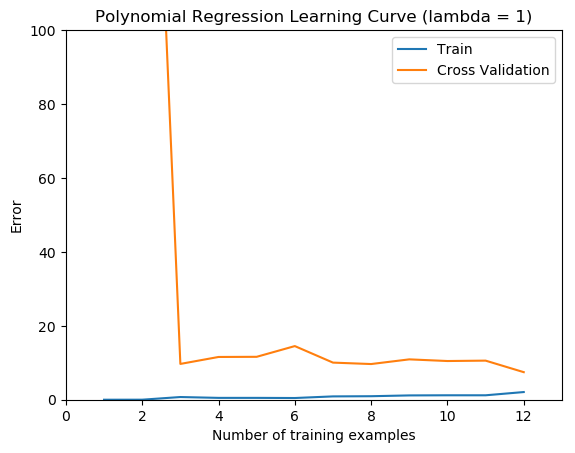

Iteration	1| Cost: 117.79067758707177
Iteration	2| Cost: 90.29401440143315
Iteration	3| Cost: 71.98080734143801
Iteration	4| Cost: 71.75016631317696
Iteration	5| Cost: 66.84006290359761
Iteration	6| Cost: 66.73414099544203
Iteration	7| Cost: 66.73382002057484
Iteration	8| Cost: 66.73321658125367
Iteration	9| Cost: 66.73316229465581
Iteration	10| Cost: 66.73316092478159
Iteration	11| Cost: 66.73316090957537
Iteration	12| Cost: 66.7331608999001
Iteration	13| Cost: 66.73316088828767
Iteration	14| Cost: 66.73316088799152
Iteration	15| Cost: 66.73316088782056
Iteration	16| Cost: 66.73316088777399


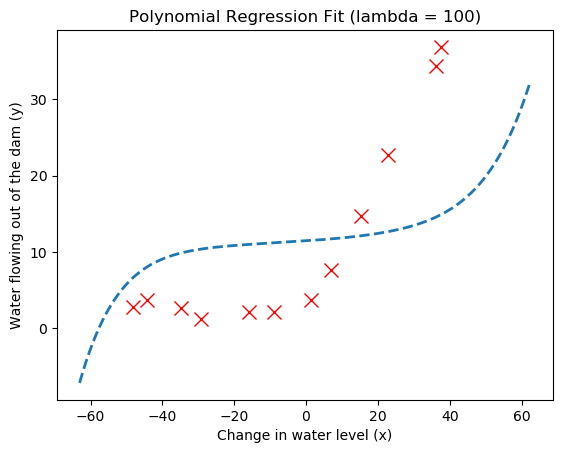

Iteration	1| Cost: 0.18155957587193916
Iteration	2| Cost: 0.0002478593804738659
Iteration	3| Cost: 0.0002370939960599351
Iteration	4| Cost: 3.2367321135626305e-07
Iteration	5| Cost: 3.096149718093517e-07
Iteration	6| Cost: 4.226765503054861e-10
Iteration	1| Cost: 0.22953655863688402
Iteration	2| Cost: 0.019150625861344285
Iteration	3| Cost: 0.01912965592956816
Iteration	1| Cost: 45.793713698453
Iteration	2| Cost: 28.366214923516296
Iteration	3| Cost: 28.19560043721715
Iteration	4| Cost: 28.195572903324052
Iteration	5| Cost: 28.195572842983875
Iteration	6| Cost: 28.19557242051827
Iteration	7| Cost: 28.195572412418823
Iteration	8| Cost: 28.19557235602732
Iteration	9| Cost: 28.195572354594933
Iteration	10| Cost: 28.195572345748353
Iteration	11| Cost: 28.19557234563835
Iteration	12| Cost: 28.195572345205655
Iteration	13| Cost: 28.195572345166863
Iteration	1| Cost: 90.9438310551729
Iteration	2| Cost: 44.72402499363704
Iteration	3| Cost: 44.206789338983555
Iteration	4| Cost: 44.2067744033257

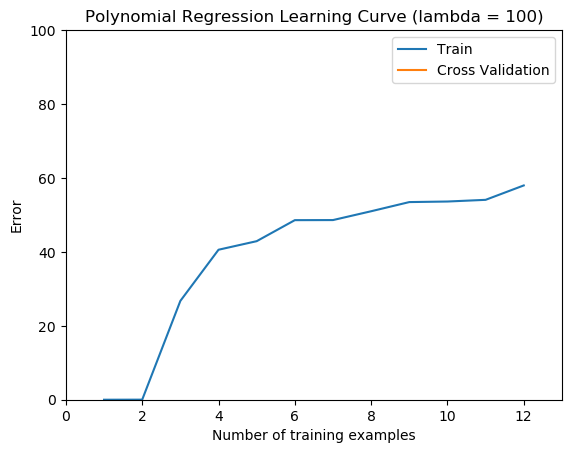

In [1117]:
# Choose the lambda parameter
labdas = [1, 100]
for lambda_ in labdas:
    theta = train_linear_reg(X_poly, y, lambda_)
    # Plot training data and fit
    plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
    plot_fit(X.min(), X.max(), mu, sigma, theta, p)
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    plt.title(f'Polynomial Regression Fit (lambda = {lambda_})')
    plt.show()
    error_train, error_val = learning_curve(X_poly, y, X_poly_val, yval, lambda_)
    plt.plot(range(1, m + 1), error_train, label='Train')
    plt.plot(range(1, m + 1), error_val, label='Cross Validation')
    plt.legend()
    plt.title(f'Polynomial Regression Learning Curve (lambda = {lambda_})')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.xlim(0, 13)
    plt.ylim(0, 100)
    plt.show()

For $\lambda = 1$, you should see a polynomial fit that follows the data trend well and a learning curve showing that both the cross validation and training error converge to a relatively low value. This shows the $\lambda = 1$ regularized polynomial regression model does not have the high-bias or high-variance problems. In effect, it achieves a good trade-off between bias and variance.
For $\lambda = 100$, you should see a polynomial fit that does not follow the data well. In this case, there is too much regularization and the model is unable to fit the training data.

#### 3.3 Selecting $\lambda$ using a cross validation set
From the previous parts of the exercise, you observed that the value of $\lambda$ can significantly affect the results of regularized polynomial regression on the training and cross validation set. In particular, a model without regularization ($\lambda = 0$) fits the training set well, but does not generalize. Conversely, a model with too much regularization ($\lambda = 100$) does not fit the training set and testing set well. A good choice of $\lambda$ (e.g., $\lambda = 1$) can provide a good fit to the data.
In this section, you will implement an automated method to select the $\lambda$ parameter. Concretely, you will use a cross validation set to evaluate how good each $\lambda$ value is. After selecting the best $\lambda$ value using the cross validation set, we can then evaluate the model on the test set to estimate how well the model will perform on actual unseen data. Your task is to complete the code in the function `validation_curve` below. Specifically, you should should use the `train_linear_reg` function to train the model using different values of $\lambda$ and compute the training error and cross validation error. You should try $\lambda$ in the following range: [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10].

In [1118]:
def validation_curve(X, y, Xval, yval):
    lambdas = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    error_train = np.zeros(len(lambdas))
    error_val = np.zeros(len(lambdas))
    for i in range(len(lambdas)):
        lambda_ = lambdas[i]
        theta = train_linear_reg(X, y, lambda_)
        error_train[i] = linear_reg_cost_function(X, y, theta, 0)[0]
        error_val[i] = linear_reg_cost_function(Xval, yval, theta, 0)[0]
    return lambdas, error_train, error_val

After you have completed the code, the code below will run your function and plot a cross validation curve of error v.s. $\lambda$ that allows you select which $\lambda$ parameter to use. You should see a plot similar to the one below.

In [1119]:
lambda_vec, error_train, error_val = validation_curve(X_poly, y, X_poly_val, yval)

Iteration	1| Cost: 76.0225051911173
Iteration	2| Cost: 17.170785488512646
Iteration	3| Cost: 4.388152728268531
Iteration	4| Cost: 3.1951413546429692
Iteration	5| Cost: 2.4634946641318147
Iteration	6| Cost: 1.224274582168893
Iteration	7| Cost: 1.0928246997831768
Iteration	8| Cost: 0.6998658722443585
Iteration	9| Cost: 0.42644373939596264
Iteration	10| Cost: 0.4195687859797102
Iteration	11| Cost: 0.4134960367158244
Iteration	12| Cost: 0.38990414676733565
Iteration	13| Cost: 0.37475797912296294
Iteration	14| Cost: 0.37408171184252764
Iteration	15| Cost: 0.3572804729927941
Iteration	16| Cost: 0.340098159436919
Iteration	17| Cost: 0.33862188356726924
Iteration	18| Cost: 0.33060425637183755
Iteration	19| Cost: 0.3294489562814954
Iteration	20| Cost: 0.3274724975341856
Iteration	21| Cost: 0.3230007853534324
Iteration	22| Cost: 0.3084177518986118
Iteration	23| Cost: 0.3005838265488394
Iteration	24| Cost: 0.29312602947733174
Iteration	25| Cost: 0.27871069940407805
Iteration	26| Cost: 0.270286517

Text(0,0.5,'Error')

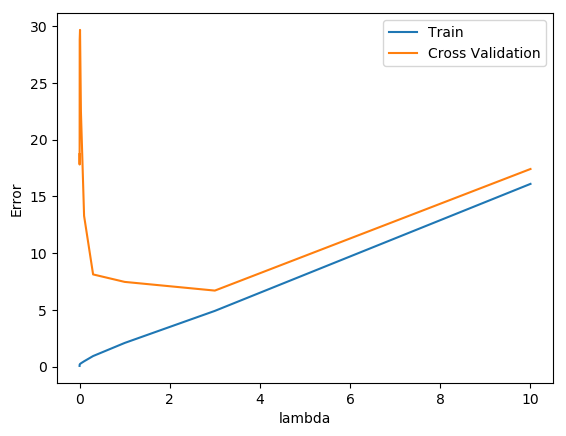

In [1120]:
plt.plot(lambda_vec, error_train, label='Train')
plt.plot(lambda_vec, error_val, label='Cross Validation')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('Error')

In [1121]:
print('#\tLambda\tTrain Error\tCross Validation Error')
for i in range(len(lambda_vec)):
    print('%d\t%.4f\t%f\t%f' % (i, lambda_vec[i], error_train[i], error_val[i]))

#	Lambda	Train Error	Cross Validation Error
0	0.0000	0.051678	18.715367
1	0.0010	0.122391	17.800877
2	0.0030	0.171760	28.811148
3	0.0100	0.221448	29.659759
4	0.0300	0.281852	22.451090
5	0.1000	0.459328	13.277074
6	0.3000	0.921755	8.114462
7	1.0000	2.076188	7.456103
8	3.0000	4.901348	6.690073
9	10.0000	16.092210	17.404631


In this figure, you can observe that the best value of $\lambda$ is around 3. Due to randomness in the training and validation splits of the dataset, the cross validation error can sometimes be lower than the training error.

#### 3.4 Optional (ungraded) exercise: Computing test set error
To get a better indication of a model's performance in the real world, it is important to evaluate the "final" model on a test set that was not used in any part of training (that is, it was neither used to select the $\lambda$ parameters, nor to learn the model parameters). For this optional (ungraded) exercise, you should compute the test error using the best value of $\lambda$ you found. In our cross validation, we obtained a test error of 3.8599 for $\lambda = 3$.

In [1122]:
lambda_ = 3
theta = train_linear_reg(X_poly, y, lambda_)
error_test = linear_reg_cost_function(X_poly_test, ytest, theta, lambda_)[0]
print('Test error for lambda = 3:', error_test)

Iteration	1| Cost: 78.15421892736926
Iteration	2| Cost: 30.145669470634175
Iteration	3| Cost: 23.232645363744574
Iteration	4| Cost: 18.30478049991194
Iteration	5| Cost: 17.677276145758793
Iteration	6| Cost: 16.014667314437812
Iteration	7| Cost: 15.913051444026106
Iteration	8| Cost: 15.902345816337847
Iteration	9| Cost: 15.882040355269552
Iteration	10| Cost: 15.869749267127638
Iteration	11| Cost: 15.86864055032715
Iteration	12| Cost: 15.868071448464455
Iteration	13| Cost: 15.867881924852188
Iteration	14| Cost: 15.867799736250504
Iteration	15| Cost: 15.867747430304634
Iteration	16| Cost: 15.867735706002083
Iteration	17| Cost: 15.867713779151245
Iteration	18| Cost: 15.8676955257266
Iteration	19| Cost: 15.867693887140902
Iteration	20| Cost: 15.867689476712084
Iteration	21| Cost: 15.867688599454643
Iteration	22| Cost: 15.867688258384515
Iteration	23| Cost: 15.867688232621237
Iteration	24| Cost: 15.86768820408357
Iteration	25| Cost: 15.867688203868553
Iteration	26| Cost: 15.867688203215003
I

#### 3.5 Optional (ungraded) exercise: Plotting learning curves with randomly selected examples
In practice, especially for small training sets, when you plot learning curves to debug your algorithms, it is often helpful to average across multiple sets of randomly selected examples to determine the training error and cross validation error. Concretely, to determine the training error and cross validation error for $i$ examples, you should first randomly select $i$ examples from the training set and $i$ examples from the cross validation set. You will then learn the parameters $\theta$ using the randomly chosen training set and evaluate the parameters $\theta$ on the randomly chosen training set and cross validation set. The above steps should then be repeated multiple times (say 50) and the averaged error should be used to determine the training error and cross validation error for $i$ examples.
For this optional (ungraded) exercise, you should implement the above strategy to plot learning curves in `learning_curve` and use the code below to call your modified function and generate the plot.

In [1123]:
def learning_curve(X, y, Xval, yval, lambda_):
    m = X.shape[0]
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    for i in range(1, m + 1):
        error_train_sum = 0
        error_val_sum = 0
        for _ in range(50):
            idx = np.random.choice(X.shape[0], i, replace=False)
            theta = train_linear_reg(X[idx, :], y[idx], lambda_)
            error_train_sum += linear_reg_cost_function(X[idx, :], y[idx], theta, 0)[0]
            error_val_sum += linear_reg_cost_function(Xval, yval, theta, 0)[0]
        error_train[i - 1] = error_train_sum / 50
        error_val[i - 1] = error_val_sum / 50
    return error_train, error_val

In [1124]:
lambda_ = 0.01
error_train, error_val = learning_curve(X_poly, y, X_poly_val, yval, lambda_)

Iteration	1| Cost: 0.044020138560648576
Iteration	2| Cost: 3.0713740568305568e-28
Iteration	1| Cost: 0.044020138560648576
Iteration	2| Cost: 3.0713740568305568e-28
Iteration	1| Cost: 0.0003875452266370455
Iteration	2| Cost: 8.50851775305976e-33
Iteration	1| Cost: 1.1438956383262673
Iteration	2| Cost: 0.018250258523526755
Iteration	3| Cost: 3.2947885042203526e-30
Iteration	1| Cost: 0.0006633270072742071
Iteration	2| Cost: 2.0919517259775995e-31
Iteration	1| Cost: 0.004810595962709239
Iteration	2| Cost: 3.19052122493782e-31
Iteration	1| Cost: 0.004810595962709239
Iteration	2| Cost: 3.19052122493782e-31
Iteration	1| Cost: 0.00027320009662682424
Iteration	2| Cost: 0.0001407113457964843
Iteration	3| Cost: 0.00013963269871751383
Iteration	4| Cost: 6.034033322141808e-07
Iteration	5| Cost: 5.987778399494178e-07
Iteration	6| Cost: 2.215725972779885e-28
Iteration	1| Cost: 0.06506354078310903
Iteration	2| Cost: 0.01020887704493545
Iteration	3| Cost: 0.0016061256467667683
Iteration	4| Cost: 0.0015

(0, 100)

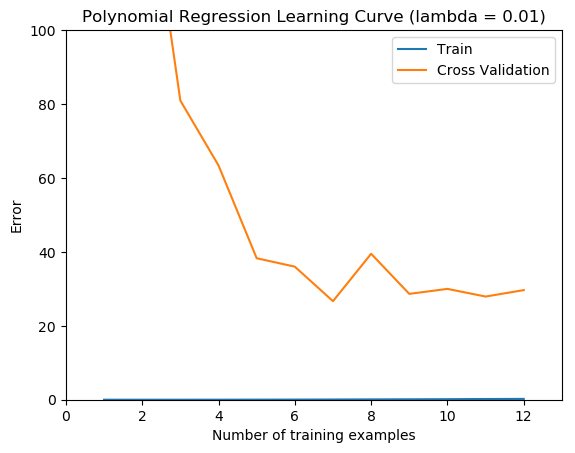

In [1125]:
plt.plot(range(1, m + 1), error_train, label='Train')
plt.plot(range(1, m + 1), error_val, label='Cross Validation')
plt.legend()
plt.title(f'Polynomial Regression Learning Curve (lambda = {lambda_})')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.xlim(0, 13)
plt.ylim(0, 100)

For reference, Figure 10 shows the learning curve we obtained for polynomial regression with $\lambda = 0.01$.
Your figure may differ slightly due to the random selection of examples.